In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd "/content/drive/MyDrive/Colab Notebooks/Bioinformatics"
!ls

/content/drive/MyDrive/Colab Notebooks/Bioinformatics
AtomPairs2DFingerprintCount.xml
AtomPairs2DFingerprinter.xml
bioactivity_data_3class_pIC50.csv
bioactivity_data_3class_pIC50_pubchem_fp.csv
bioactivity_data.csv
bioactivity_preprocessed_data.csv
CDD_ML_Part_1_bioactivity_data.ipynb
CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb
CDD_ML_Part_3_Descriptor_Dataset_Preparation.ipynb
CDD_ML_Part_4_Regression_Random_Forest.ipynb
CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb
descriptors_output.csv
EStateFingerprinter.xml
ExtendedFingerprinter.xml
Fingerprinter.xml
fingerprints_xml.zip
GraphOnlyFingerprinter.xml
KlekotaRothFingerprintCount.xml
KlekotaRothFingerprinter.xml
MACCSFingerprinter.xml
mannwhitneyu_LogP.csv
mannwhitneyu_MW.csv
mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_NumHDonors.csv
mannwhitneyu_pIC50.csv
Miniconda3-py37_4.8.2-Linux-x86_64.sh
molecules.smi
plot_bioactivity_class.pdf
plot_ic50.pdf
plot_LogP.pdf
plot_MW.pdf
plot_MW_vs_LogP.pdf
plot_NumHAcceptors.pdf
plo

## **1. Import libraries**

In [3]:
! pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.4/797.4 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existi

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
df = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examine X dimension
X.shape

(259, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(259, 185)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
#models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 207, number of used features: 185
[LightGBM] [Info] Start training from score 5.046075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [9]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,30432861451100633049966584185893855666751560376...,-7996085165583303350920212060318058039409505086...,2954324199738629329670237765763072.00,0.15
KernelRidge,9.86,-22.27,5.04,0.04
RANSACRegressor,6.56,-13.60,3.99,0.83
GaussianProcessRegressor,6.08,-12.34,3.82,0.04
LinearRegression,3.71,-6.13,2.79,0.03
TransformedTargetRegressor,3.71,-6.13,2.79,0.36
LarsCV,1.54,-0.41,1.24,0.49
Lasso,1.40,-0.04,1.07,0.02
DummyRegressor,1.40,-0.04,1.07,0.02


In [10]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,30432861451100633049966584185893855666751560376...,-7996085165583303350920212060318058039409505086...,2954324199738629329670237765763072.00,0.15
KernelRidge,9.86,-22.27,5.04,0.04
RANSACRegressor,6.56,-13.60,3.99,0.83
GaussianProcessRegressor,6.08,-12.34,3.82,0.04
LinearRegression,3.71,-6.13,2.79,0.03
TransformedTargetRegressor,3.71,-6.13,2.79,0.36
LarsCV,1.54,-0.41,1.24,0.49
Lasso,1.40,-0.04,1.07,0.02
DummyRegressor,1.40,-0.04,1.07,0.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

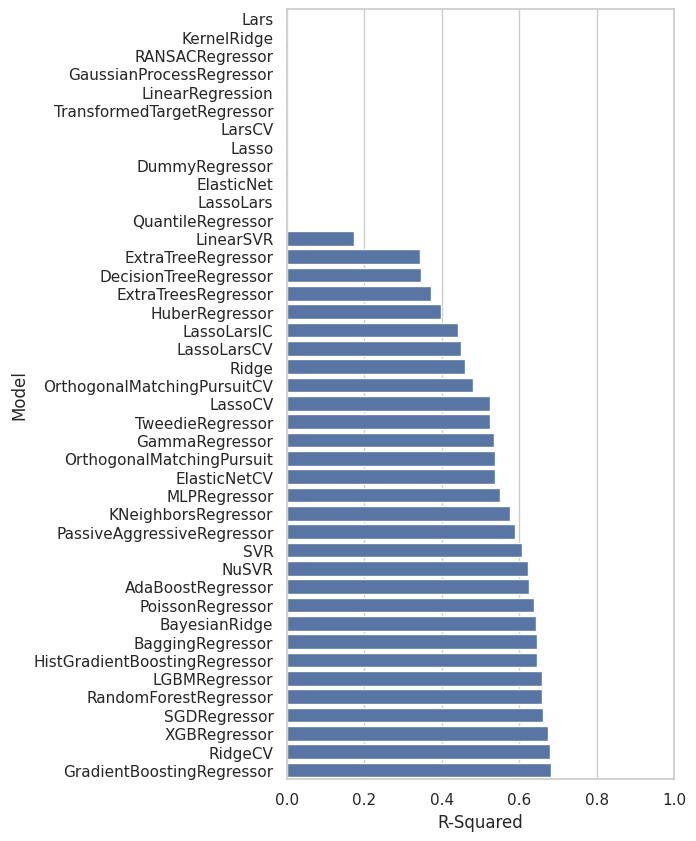

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

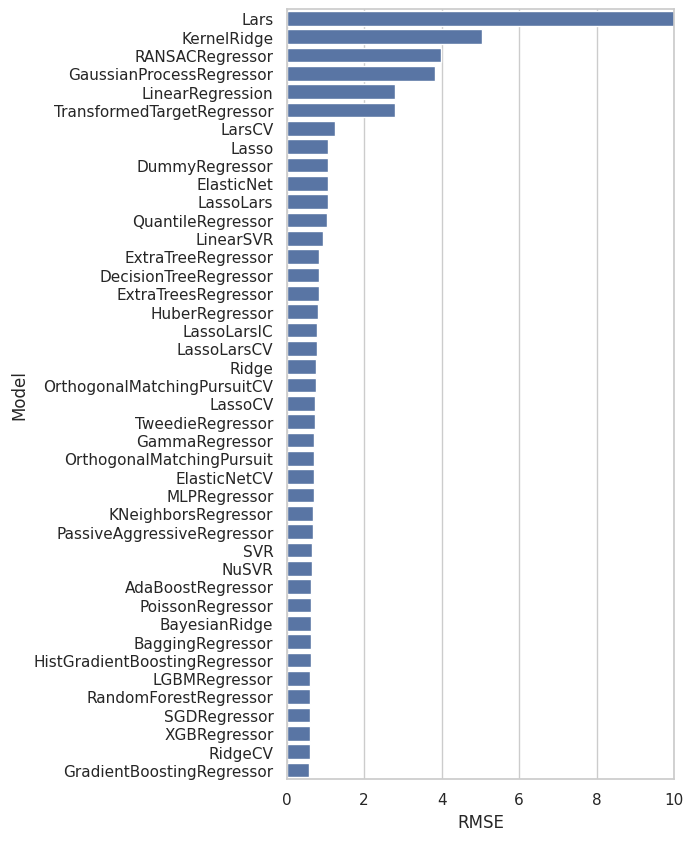

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

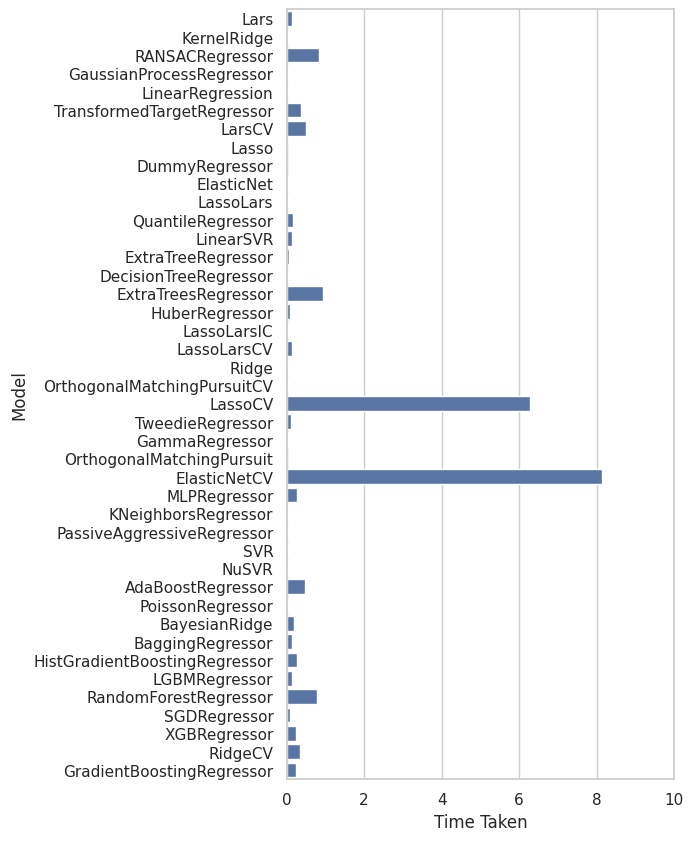

In [14]:
# Bar plot of calculation time

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))